# Kurtosis

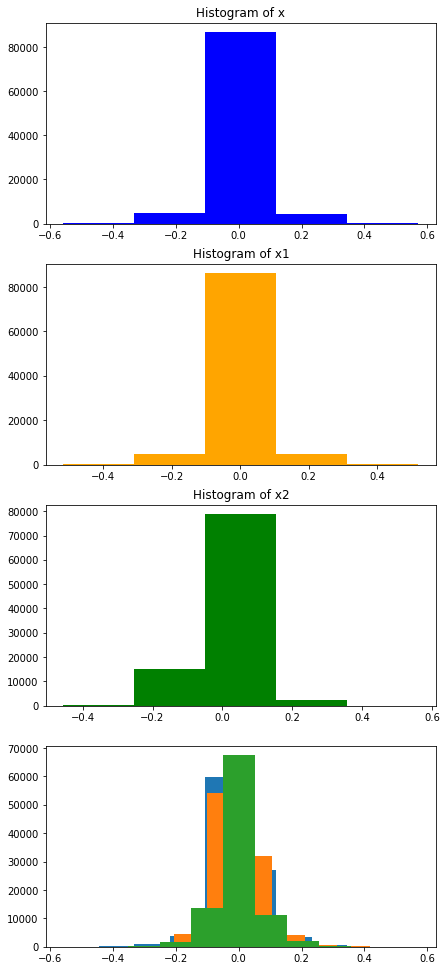

Kurtosis of original signal is:  7.293443165878747
Kurtosis of signal 1 is:  4.907141280066497
Kurtosis of signal 2 is:  3.873327835212219


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


def my_kurtosis(x):
    fourth_powers = np.power(x, 4)
    fourth_moment = np.sum(fourth_powers) / len(x)
    kurtosis = fourth_moment - 3
    return kurtosis


if __name__ == "__main__":
    x, sr = librosa.load('/home/s.wav', sr=None)
    x1, sr1 = librosa.load('/home/x1.wav', sr=None)
    x2, sr2 = librosa.load('/home/x2.wav', sr=None)

    fig, axs = plt.subplots(4, 1, figsize=(7, 17))

    axs[0].hist(x, bins=5, color='blue')
    axs[1].hist(x1, bins=5, color='orange')
    axs[2].hist(x2, bins=5, color='green')
    axs[3].hist(x)

    axs[0].set_title('Histogram of x')
    axs[1].set_title('Histogram of x1')
    axs[2].set_title('Histogram of x2')

    plt.hist(x1)
    plt.hist(x2)
    plt.show()

    standardized_x = (x - np.mean(x)) / np.std(x)
    standardized_x1 = (x1 - np.mean(x1)) / np.std(x1)
    standardized_x2 = (x2 - np.mean(x2)) / np.std(x2)

    my_kurt = my_kurtosis(standardized_x)
    my_kurt1 = my_kurtosis(standardized_x1)
    my_kurt2 = my_kurtosis(standardized_x2)

    print("Kurtosis of original signal is: ", my_kurt)
    print("Kurtosis of signal 1 is: ", my_kurt1)
    print("Kurtosis of signal 2 is: ", my_kurt2)


Explanation:

The signal with more random sources is the one which is close to the guassian distribution. Moreover, a non-guassian metric Kurtosis compares the two non-guassian distributed data. A distribution with higher Kurtosis value has more data in the tail than a normal distribution and vice versa.

In our example, signal 2 has the least Kurtosis value hence closet to the guassian distribution compared to the other signal 1. So, we can say that signal 2 has more sources than signal 1. 

This is clear in the histograms as well. Histogram of signal 1 is almost similar to the histogram of clean original signal which implies that signal 1 has the less sources compared to the signal 2. 

# Source Extraction - Power Iteration 

<Figure size 360x360 with 0 Axes>

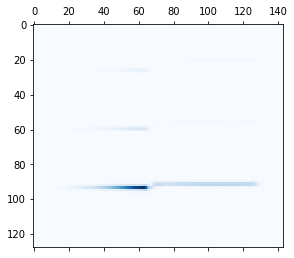

<Figure size 72x36 with 0 Axes>

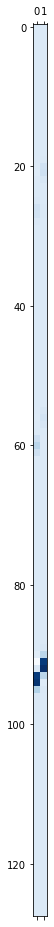

<Figure size 144x36 with 0 Axes>

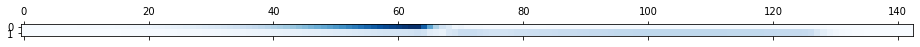

<Figure size 360x360 with 0 Axes>

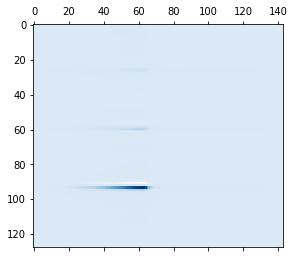

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat


def power_iteration(A, num_sim):
    x = np.random.rand(A.shape[1])

    for _ in range(num_sim):
        x1 = np.dot(A, x)
        x1_norm = np.linalg.norm(x1)
        x = x1 / x1_norm

    return x, x1_norm


if __name__ == "__main__":
    file = loadmat('/home/flute.mat')
    X = file["X"]

    c = np.cov(X, bias=True)

    eigenvector1, eigenvalue1 = power_iteration(c, 100)
    c1 = c - eigenvalue1 * np.outer(eigenvector1, eigenvector1)
    eigenvector2, eigenvalue2 = power_iteration(c1, 100)

    eigenvector1 = eigenvector1.reshape(-1, 1)
    eigenvector2 = eigenvector2.reshape(-1, 1)

    EV = np.column_stack((eigenvector1, eigenvector2))
    EVt = np.transpose(EV)

    transition_matrix = np.matmul(EVt, X)
    transition1 = transition_matrix[0].reshape(1, -1)
    source1 = np.matmul(eigenvector1, transition1)

    plt.figure(figsize=(5, 5))
    plt.matshow(X, cmap=plt.cm.Blues)

    plt.figure(figsize=(1, 0.5))
    plt.matshow(EV, cmap=plt.cm.Blues)

    plt.figure(figsize=(2, 0.5))
    plt.matshow(transition_matrix, cmap=plt.cm.Blues)

    plt.figure(figsize=(5,5))
    plt.matshow(source1, cmap=plt.cm.Blues)

    plt.show


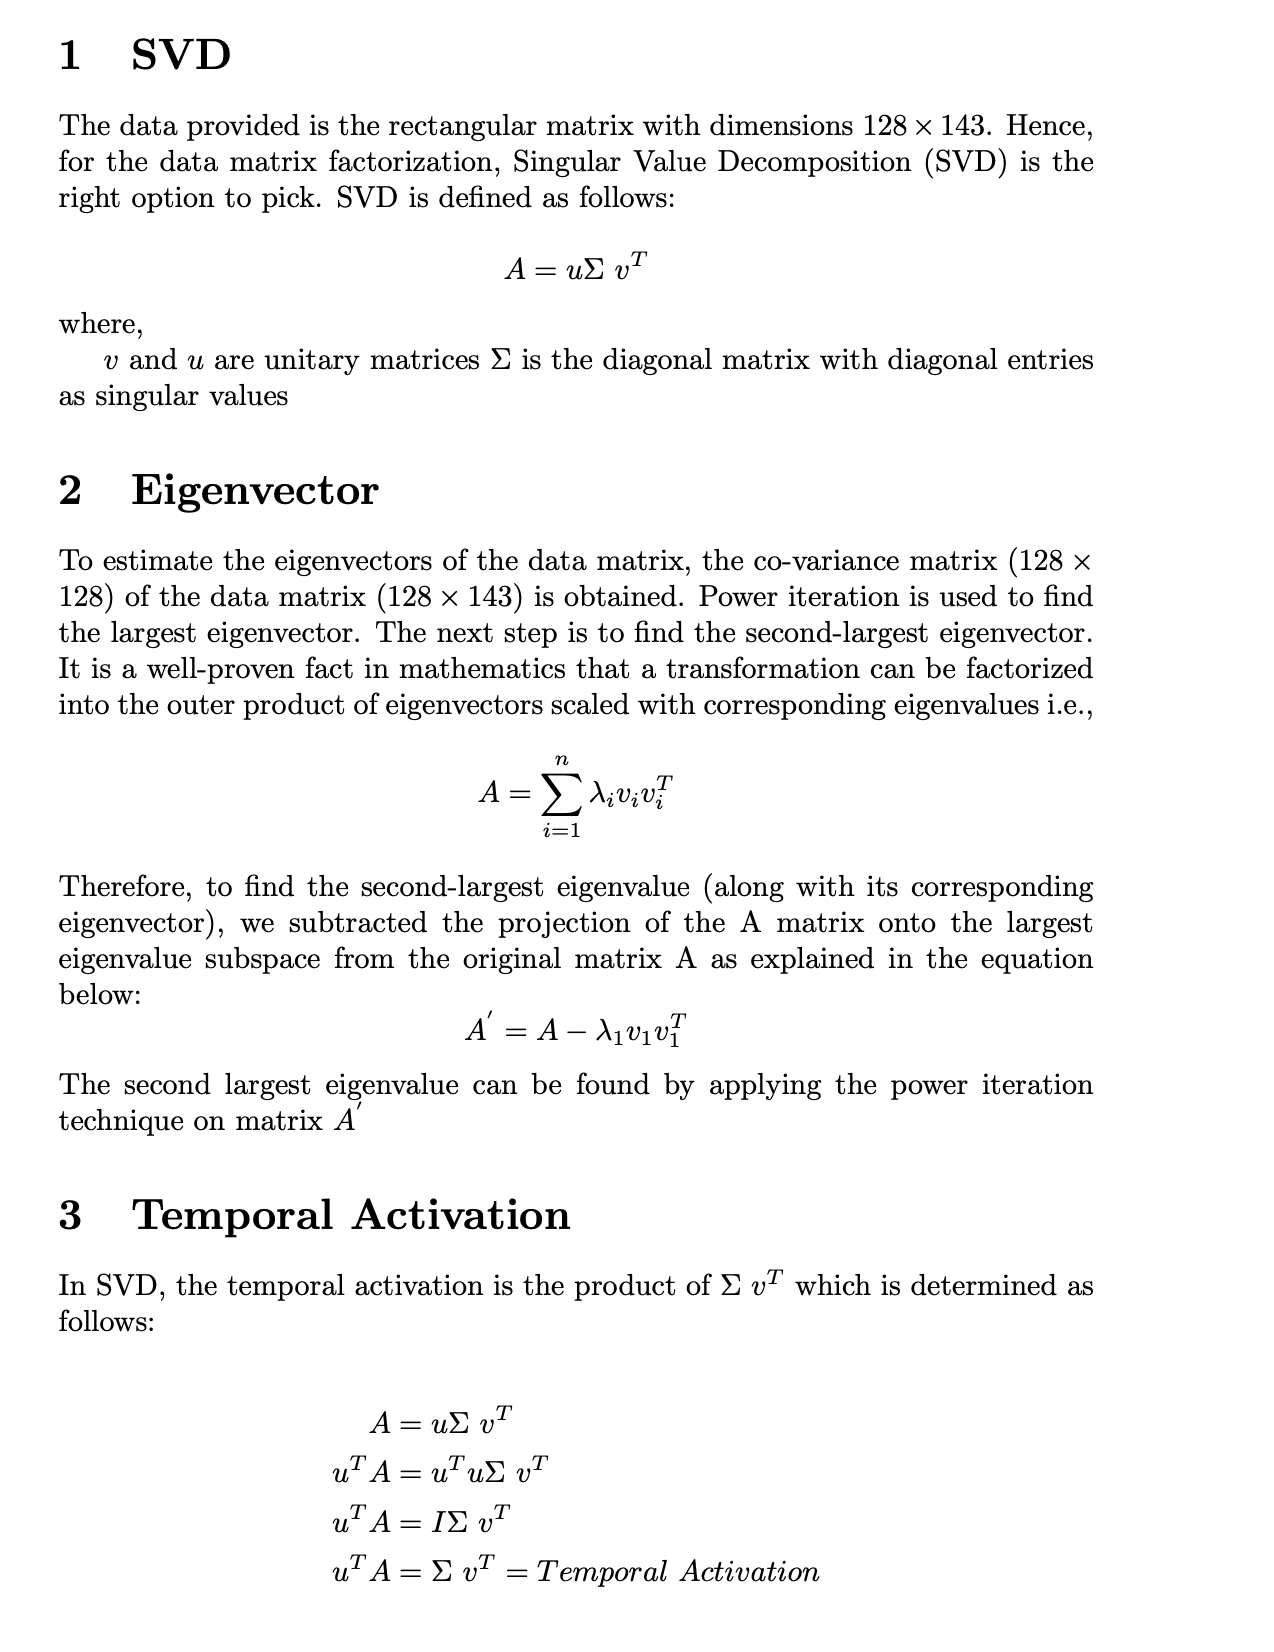

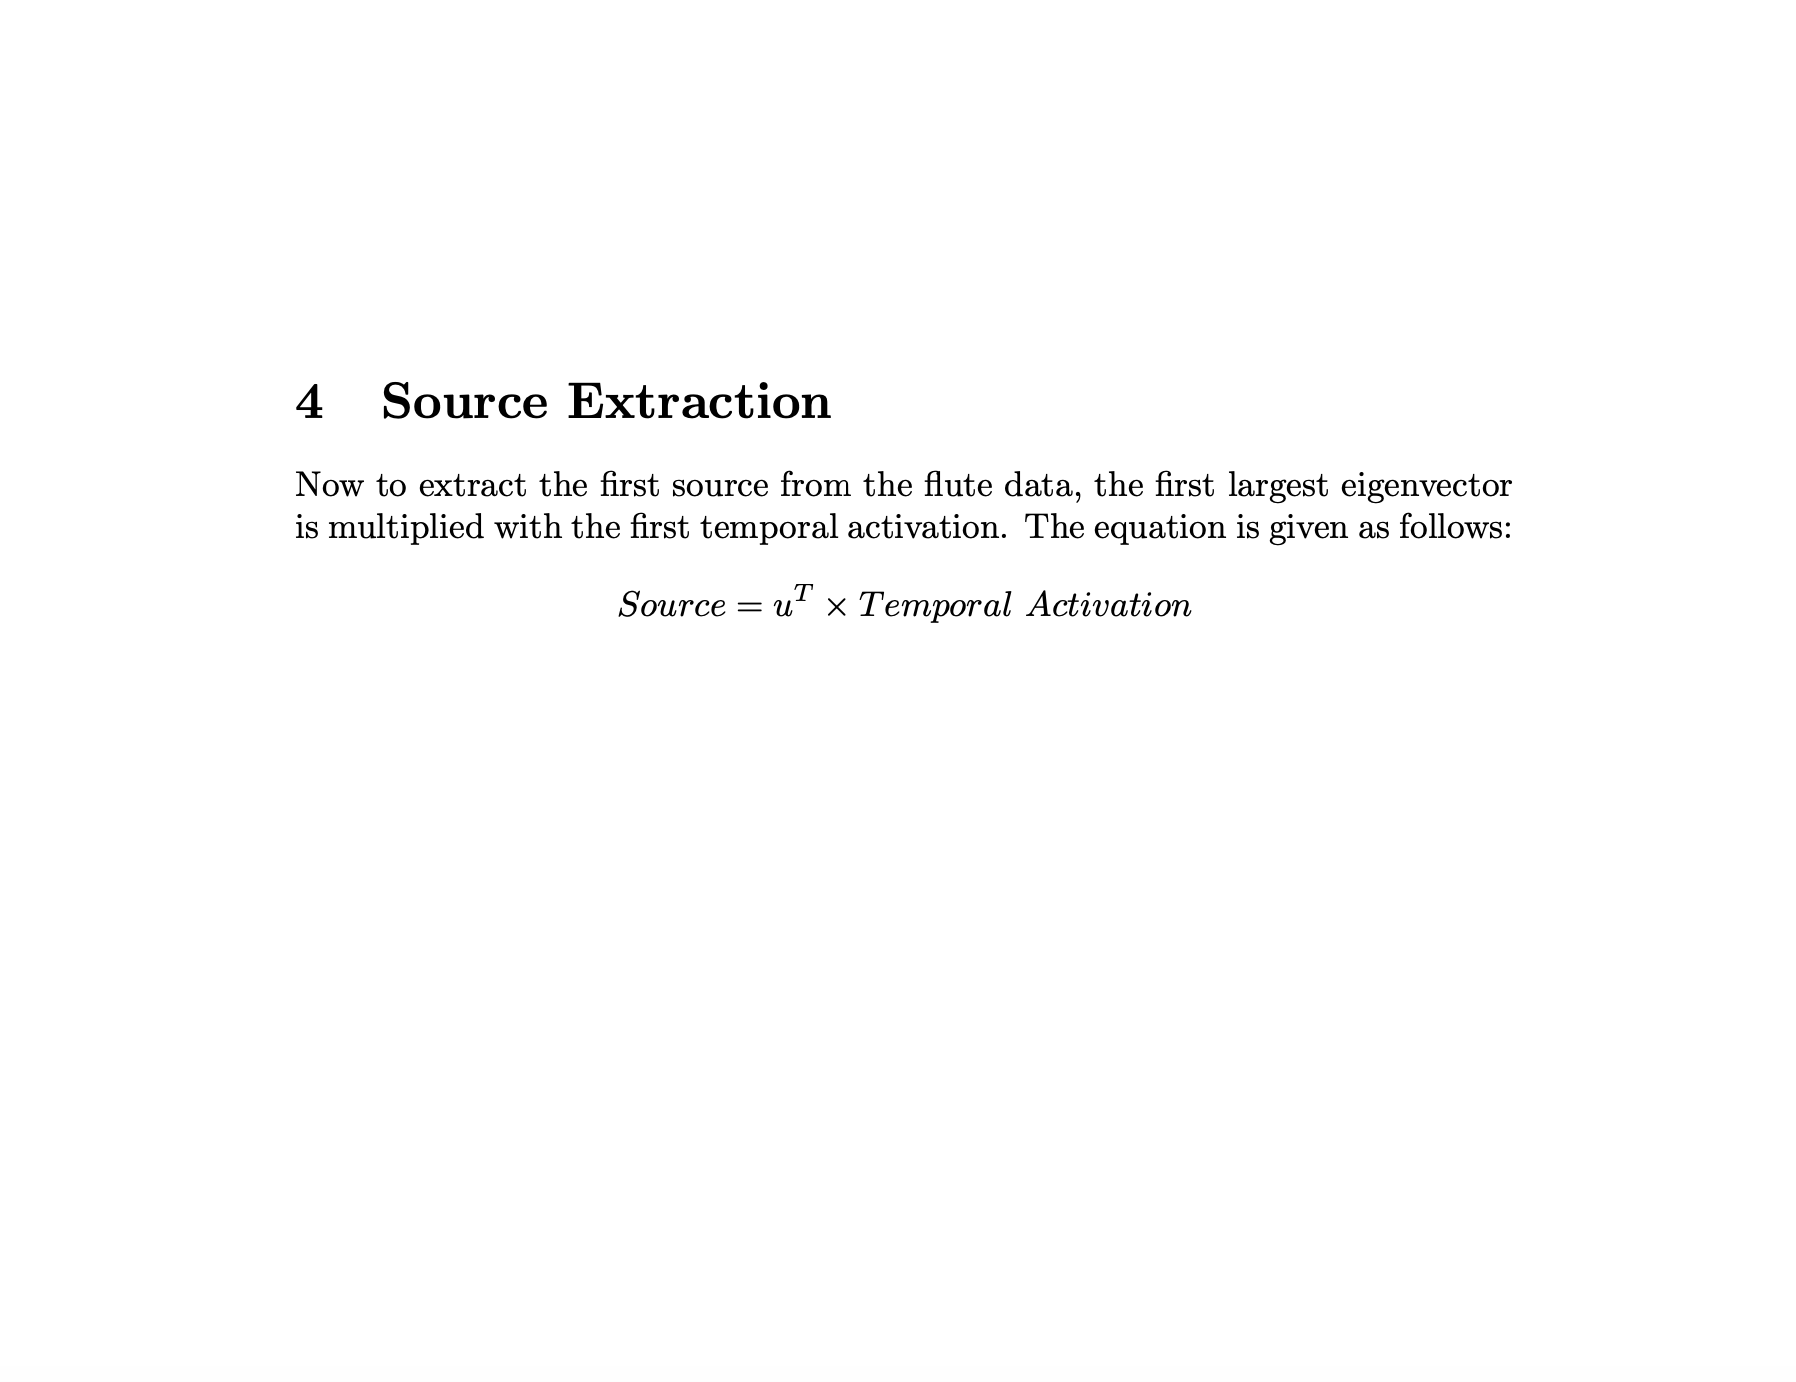